<a href="https://colab.research.google.com/github/sahil301290/TSS2022-ThaparSummerSchool/blob/main/27Jun2022_OpenCV_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Following to be covered in the OpenCV Basics**

## *1. Loading Image*

## *2. Displaying Image*

## *3. Converting to Gray Scale*

## *4. Saving Images*

## *5. BGR Color Space*

## *6. HSV Color Space*

In [1]:
import cv2
from google.colab.patches import cv2_imshow

### **Loading Image**

In [2]:
#Colored Image
img = cv2.imread("sahil1.JPG",1)
print(img.shape)
print(type(img))
#print(img)

(718, 773, 3)
<class 'numpy.ndarray'>


###**Displaying Image**

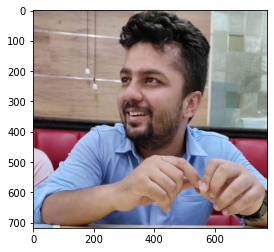

In [3]:
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

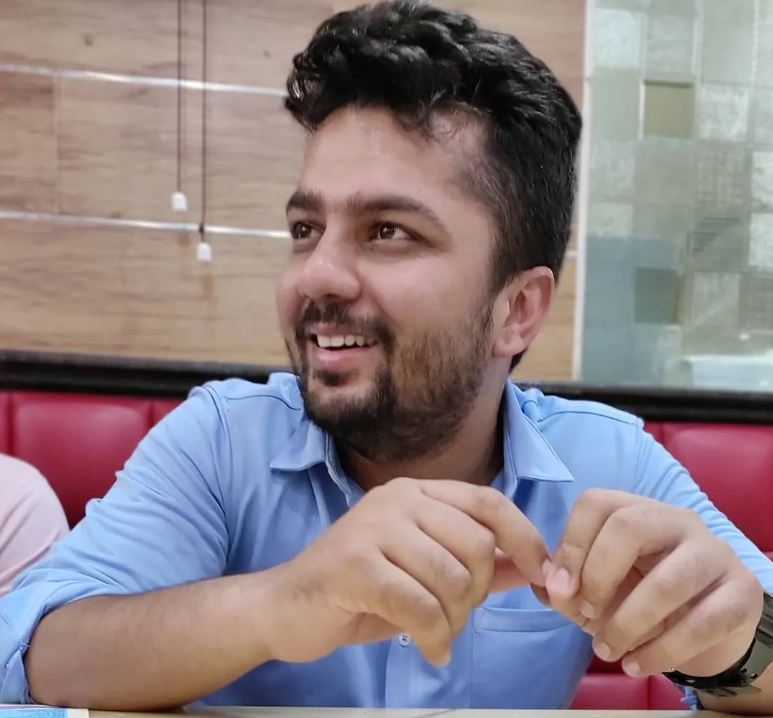

In [4]:
cv2_imshow(img)

###**Converting to Grayscale**

In [5]:
# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

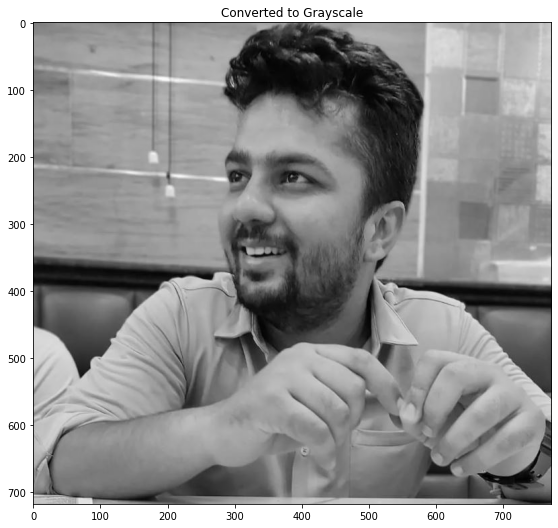

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow("Converted to Grayscale", gray_image)

In [7]:
#GrayScale (Black and White) Image
img = cv2.imread("sahil1.JPG",0)
print(img.shape)
print(type(img))
print(img)

(718, 773)
<class 'numpy.ndarray'>
[[125 125 125 ... 201 203 204]
 [125 125 125 ... 201 203 204]
 [125 126 126 ... 202 203 204]
 ...
 [196 196 195 ...  19  20  19]
 [196 195 193 ...  45  46  46]
 [196 194 192 ...  76  77  77]]


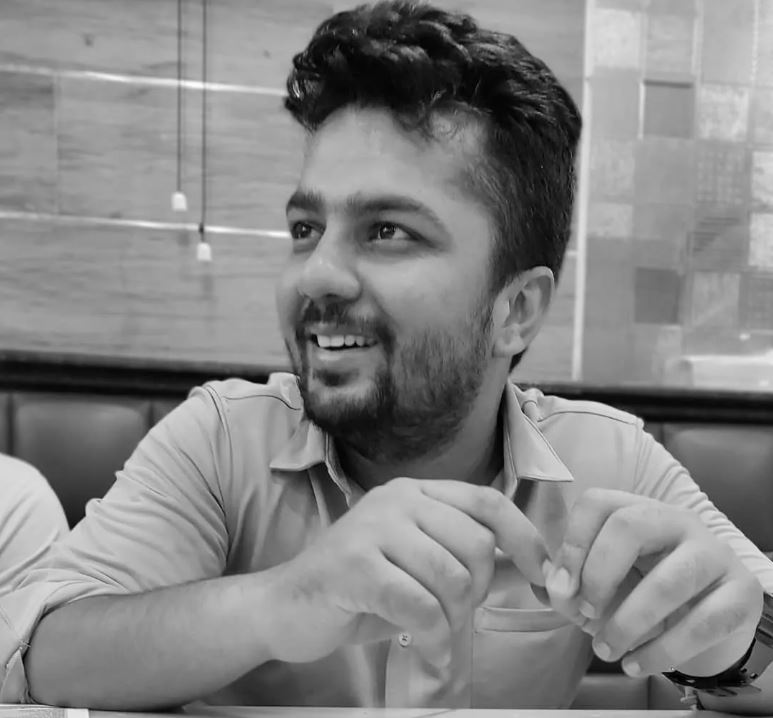

In [8]:
cv2_imshow(img)

###**Saving images**

In [9]:
# Simply use 'imwrite' specificing the file name and the image to be saved
cv2.imwrite('output.jpg', img)

True

# **Color Spaces**

1. View the individual channels of an RGB Image
2. Manipulate a color space
3. Introduce HSV Color Spaces

In [10]:
import numpy as np

In [11]:
# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-06-25 06:29:52--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.178
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  18.8MB/s    in 1.5s    

2022-06-25 06:29:54 (18.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [12]:
# Load our input image
image = cv2.imread('./images/castara.jpeg')

# Use cv2.split to get each color space separately
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(1280, 960)
(1280, 960)
(1280, 960)


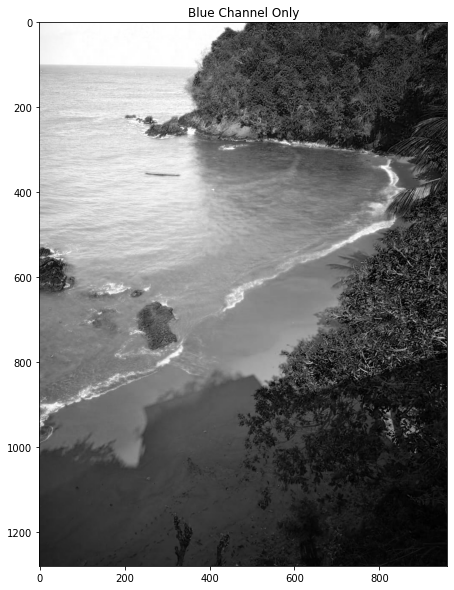

In [13]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", B)

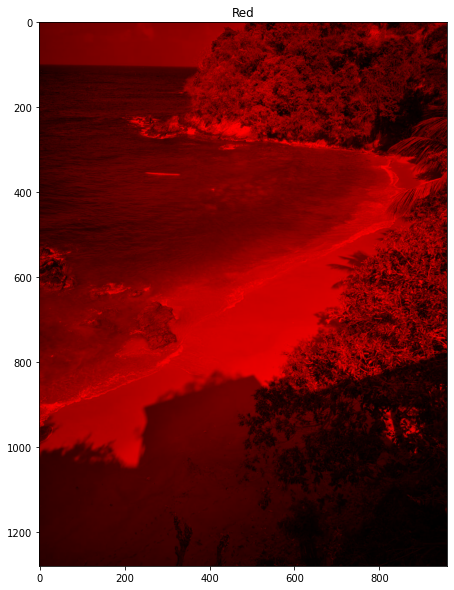

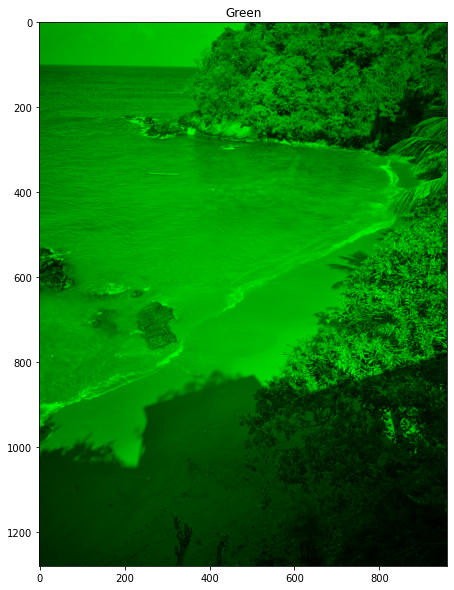

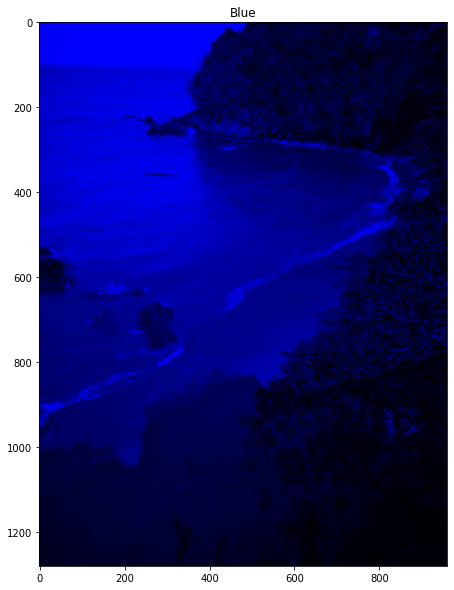

In [14]:
# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

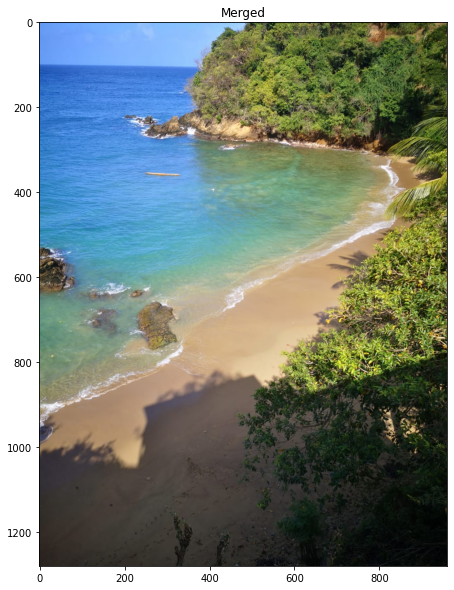

In [15]:
image = cv2.imread('./images/castara.jpeg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# Let's re-make the original image, 
merged = cv2.merge([B, G, R]) 
imshow("Merged", merged) 

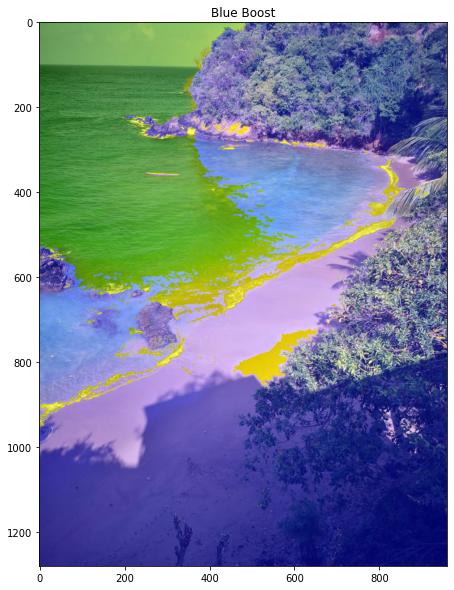

In [16]:
# Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged)

## **HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

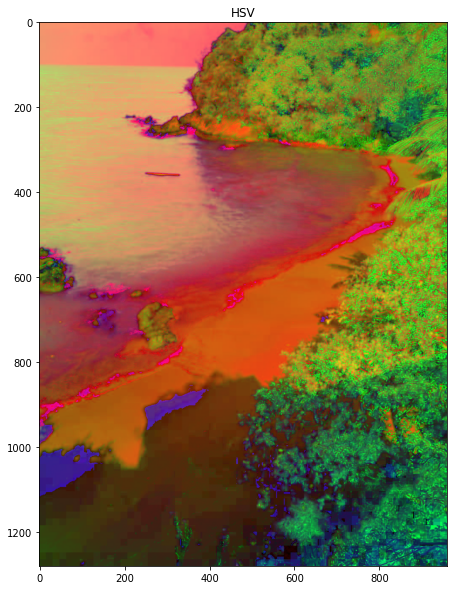

In [17]:
# Reload our image
image = cv2.imread('./images/castara.jpeg')

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('HSV', hsv_image)

#### This looks odd....why? 

Because our plotting function was designed for RGB only images, not HSV

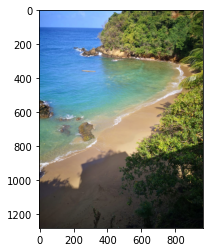

In [19]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

### **Let's view each channel type in the HSV Color Space representation**

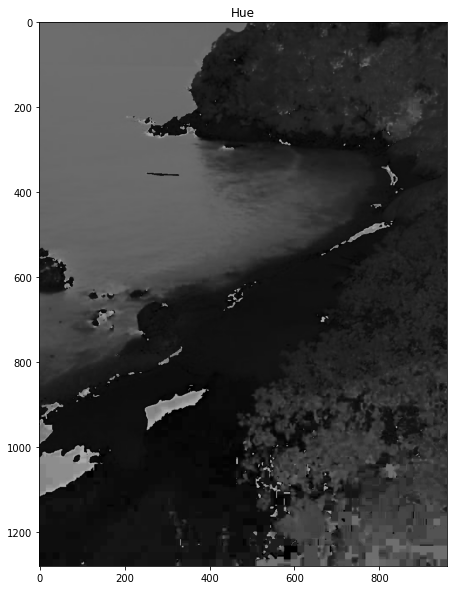

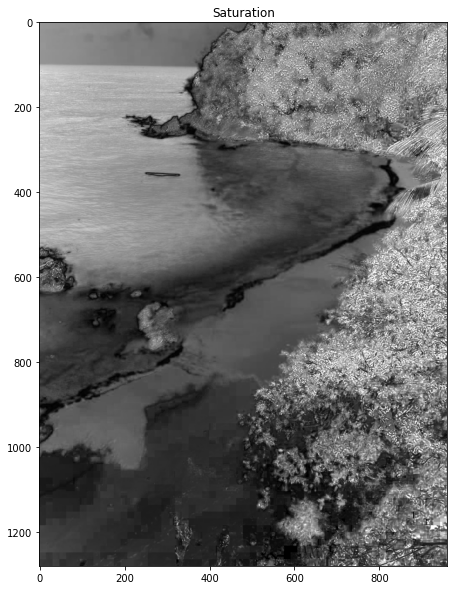

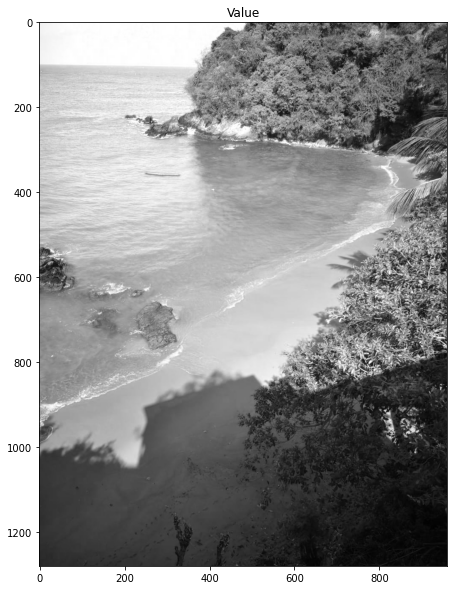

In [20]:
# Switching back to viewing the RGB representation
imshow("Hue", hsv_image[:, :, 0])
imshow("Saturation", hsv_image[:, :, 1])
imshow("Value", hsv_image[:, :, 2])

###End of Code